In [14]:
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
from termcolor import colored

# Equação característica modo TE

In [1]:
nf = 3.48
ns = 1.45
nc = 1.00
a  = 1.0e-6
lmbd = 3e-6
c0 = 299792458
pi = np.pi
arredondamento = 4

In [2]:
pc = (nf/nc)**2
ps = (nf/ns)**2
k0 = 2*np.pi/lmbd
NA = np.sqrt(nf**2-ns**2)
V  = a*k0*NA
delta = (ns**2-nc**2)/(nf**2-ns**2)
print(V)

6.625674435630004


In [3]:
neff = np.linspace(ns, nf, 1000)
u = a*k0*np.sqrt(nf**2-neff**2)
v = a*k0*np.sqrt(neff**2-ns**2)
w = a*k0*np.sqrt(neff**2-nc**2)

In [4]:
f1TE = u*(v+w)/(u**2-v*w)
f1TE[:-1][np.diff(f1TE) < -5] = np.nan

f2   = np.tan(2*u)
f2[:-1][np.diff(f2) < -5] = np.nan

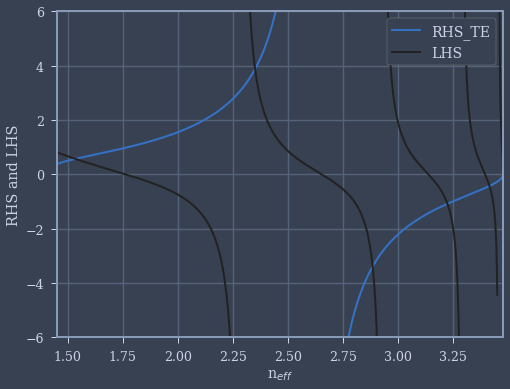

In [5]:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}

fig1 = plt.figure(figsize=(8,6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
plt.plot(neff, f1TE, 'b', linewidth = 2, label = 'RHS_TE')
plt.plot(neff, f2, 'k', linewidth = 2, label = 'LHS')
plt.xlim([ns, nf])
plt.ylim([-6,6])
plt.xlabel(r'n$_{eff}$')
plt.ylabel(r'RHS and LHS')
plt.grid(True)
plt.legend(loc = 'upper right', framealpha = 1, fontsize = 14)

In [6]:
def Vb(b, sigma, pc, ps, m):
  return 1/(2*np.sqrt(1-b))*(m*np.pi + np.arctan(pc*np.sqrt(b+sigma)/np.sqrt(1-b)) + np.arctan(ps*np.sqrt(b)/np.sqrt(1-b)))  

def b2neff(ns, NA, b):
  return np.sqrt(b*NA**2+ns**2)

In [7]:
fig3 = plt.figure(figsize=(8,6))
plt.rc('font', **font)
plt.rcParams['axes.prop_cycle'] = cycler(color='bgry')

b  = np.linspace(0, .99, 1000)

sigma = 0
for m in range(4):
  Vc = Vb(b, sigma, 1, 1, m)
  #plt.plot(Vc, b2neff(ns, NA, b), linewidth = 2, label = 'TE$_{%d}$' %(m))
  plt.plot(Vc, b, linewidth = 2, label = 'TE$_{%d}$' %(m))

sigma = 2
for m in range(4):
  Vc = Vb(b, sigma, 1, 1, m)
  #plt.plot(Vc, b2neff(ns, NA, b), '--', linewidth = 2, label = 'TE$_{%d}$' %(m))
  plt.plot(Vc, b, '--', linewidth = 2)

sigma = 1000
for m in range(4):
  Vc = Vb(b, sigma, 1, 1, m)
  #plt.plot(Vc, b2neff(ns, NA, b), '-.', linewidth = 2, label = 'TE$_{%d}$' %(m))
  plt.plot(Vc, b, '-.', linewidth = 2)

plt.text(0.3,0.2,r'$\delta = 0$', rotation = 70)
plt.text(0.6,0.2,r'$\delta = 2$', rotation = 70)
plt.text(0.9,0.2,r'$\delta = \infty$', rotation = 70)

plt.xlim([0,6])
#plt.ylim([ns,nf])
plt.ylim([0,1])
plt.xlabel(r'$V$ - Frequência normalizada')
#plt.ylabel(r'$n_{eff}$ - Indice efetivo')
plt.ylabel(r'$n_{b}$ - Constante de propagação normalizada')
plt.grid(True)
plt.legend(loc = 'upper left', framealpha = 1, fontsize = 14)
#('ass_dlt_guide_carc_equation_TE.pdf', bbox_inches='tight')

NameError: name 'cycler' is not defined

<Figure size 576x432 with 0 Axes>

In [8]:
M = (2*V-np.arctan(np.sqrt(delta)))/np.pi
print(V)
print('Argumento da função: %5.2f' %(M))
M = np.floor(M)
print('ìndice do modo de maior ordem: %d' %M)
print('Número de modos TE: %d' %(M+1))

6.625674435630004
Argumento da função:  4.12
ìndice do modo de maior ordem: 4
Número de modos TE: 5


In [9]:
print('Frequência de corte - modos TE:')
for i in range(int(M+2)):
  Vc = (i*np.pi+np.arctan(np.sqrt(delta)))/2
  fc = Vc/(2*np.pi*a/c0*NA)  
  if (i==(M+1)):
    print(colored('TE%d - %5.2f THz - %5.2f nm (Vc = %4.2f)' %(i, 1e-12*fc, 1e9*c0/fc, Vc), 'red'))
  else:
    print('TE%d - %5.2f THz - %5.2f nm (Vc = %4.2f)' %(i, 1e-12*fc, 1e9*c0/fc, Vc))
print('V = %4.2f' %V)

Frequência de corte - modos TE:
TE0 -  2.42 THz - 124050.25 nm (Vc = 0.16)
TE1 - 26.11 THz - 11482.77 nm (Vc = 1.73)
TE2 - 49.80 THz - 6020.01 nm (Vc = 3.30)
TE3 - 73.49 THz - 4079.33 nm (Vc = 4.87)
TE4 - 97.18 THz - 3084.86 nm (Vc = 6.44)


NameError: name 'colored' is not defined

# Equação característica modo TM

In [10]:
f1TM = u*(ps*v+pc*w)/(u**2-ps*pc*v*w)
f1TM[:-1][np.diff(f1TM) < -5] = np.nan

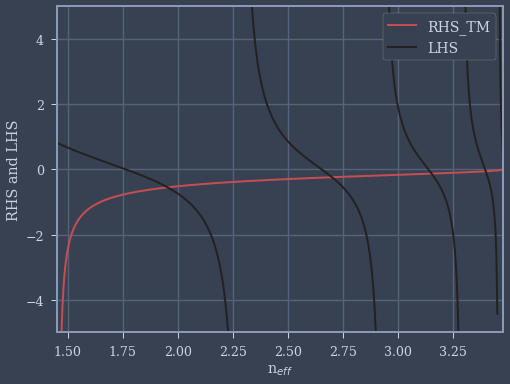

In [11]:
fig2 = plt.figure(figsize=(8,6))
plt.rc('font', **font)
plt.plot(neff, f1TM, 'r', linewidth = 2, label = 'RHS_TM')
plt.plot(neff, f2, 'k', linewidth = 2, label = 'LHS')
plt.xlim([ns, nf])
plt.ylim([-5,5])
plt.xlabel(r'n$_{eff}$')
plt.ylabel(r'RHS and LHS')
plt.grid(True)
plt.legend(loc = 'upper right', framealpha = 1, fontsize = 14)
#('ass_dlt_guide_TM.pdf', bbox_inches='tight')

In [12]:
fig4 = plt.figure(figsize=(8,6))
plt.rc('font', **font)
plt.rcParams['axes.prop_cycle'] = cycler(color='bgry')

sigma = 0
for m in range(4):
  Vc = Vb(b, sigma, 4, 4, m)
  plt.plot(Vc, b, linewidth = 2, label = 'TM$_{%d}$' %(m))

sigma = 1000
for m in range(4):
  Vc = Vb(b, sigma, 4, 4, m)
  plt.plot(Vc, b, '-.', linewidth = 2)

plt.text(1.0,0.2,r'$\delta = 0$', rotation = 70)
plt.text(1.6,0.2,r'$\delta = \infty$', rotation = 70)

plt.xlim([0,6])
plt.ylim([0,1])
plt.xlabel(r'$V$ - Frequência normalizada')
plt.ylabel(r'$b$ - Constante de propagação normalizada')
plt.grid(True)
plt.legend(loc = 'upper left', framealpha = 1, fontsize = 14)
#('ass_dlt_guide_carc_equation_TM.pdf', bbox_inches='tight')

NameError: name 'cycler' is not defined

<Figure size 576x432 with 0 Axes>

In [13]:
def adguide(nf, nc, ns, lmbd, a, mode):
  mmax = 5
  tol = 1e-10
  r = 0.3

  if (mode=='TM'):
    pc = (nf/nc)**2
    ps = (nf/ns)**2
  else:
    pc = 1
    ps = 1

  delta = (ns**2-nc**2)/(nf**2-ns**2)
  k0 = 2*np.pi/lmbd
  NA = np.sqrt(nf**2-ns**2)
  R = k0*a*NA

  M = int(np.ceil((2*R-np.arctan(pc*np.sqrt(delta)))/np.pi))
  m = np.arange(0,M)

  u = R*np.ones(M)
  v = np.zeros(M)
  w = R*np.sqrt(delta)*np.ones(M)

  Nit = 1

  while True:
    F = 0.5*(np.pi*m + np.arctan(ps*v/u) + np.arctan(pc*w/u))
    u_new = r*F + (1-r)*u
    if np.any(np.abs(u_new-u) <= tol):
        break
    Nit = Nit + 1
    u = u_new
    v = np.sqrt(R**2-u**2)
    w = np.sqrt(delta*R**2+v**2)
    if Nit > 1000:
        break

  kf = u/a
  gamma_s = v/a
  gamma_c = w/a
  be = np.sqrt((nf*k0)**2 - kf**2)
  return be,be/k0, kf, gamma_s, gamma_c, M

In [14]:
betaTE,neffTE,kfTE,alsTE,alcTE,MTE = adguide(nf, nc, ns, lmbd, a, 'TE')
print(neffTE)
betaTM,neffTM,kfTM,alsTM,alcTM,MTM = adguide(nf, nc, ns, lmbd, a, 'TM')
print(neffTM)

for i in range(int(MTE)):
  lmbdcTE = (4*np.pi*a*NA)/(i*np.pi + np.arctan(np.sqrt(delta)))
  print('TE%d - %.2f nm - %.2f' %(i, 1e9*lmbdcTE, 2*a*np.pi/lmbdcTE*NA))

for i in range(int(MTM)):
  lmbdcTM = (4*np.pi*a*NA)/(i*np.pi + np.arctan(pc*np.sqrt(delta)))
  print('TM%d - %.2f nm - %.2f' %(i, 1e9*lmbdcTM, 2*a*np.pi/lmbdcTM*NA))

[3.41813366 3.22692916 2.88675239 2.35215782 1.53474128]
[3.40135847 3.15490472 2.70182547 1.9543303 ]
TE0 - 124050.25 nm - 0.16
TE1 - 11482.77 nm - 1.73
TE2 - 6020.01 nm - 3.30
TE3 - 4079.33 nm - 4.87
TE4 - 3084.86 nm - 6.44
TM0 - 29958.70 nm - 0.66
TM1 - 8896.40 nm - 2.23
TM2 - 5223.82 nm - 3.81
TM3 - 3697.45 nm - 5.38


In [15]:
fig5 = plt.figure(figsize=(8,6))
plt.rc('font', **font)

sigma = (ns**2-nc**2)/(nf**2-ns**2)
for m in range(MTE):
  plt.plot(Vb(b, sigma, 1, 1, m), b, '-', linewidth = 2, label = 'TE$_{%d}$' %(m))
for m in range(MTM):
  plt.plot(Vb(b, sigma, pc, ps, m), b, '--', linewidth = 2, label = 'TM$_{%d}$' %(m))

bTE = 1 - (kfTE*a/V)**2
bTM = 1 - (kfTM*a/V)**2

plt.plot(np.array([V,V]), np.array([0,1]), 'k--', linewidth = 2)
plt.plot(V*np.ones(MTE),bTE, 'ko', fillstyle = 'none', markersize = 10)
plt.plot(V*np.ones(MTM),bTM, 'ko', fillstyle = 'none', markersize = 10)

plt.xlim([0,np.ceil(V)])
plt.ylim([0,1])
plt.grid(True)

plt.xlabel(r'$V$ - Frequência normalizada')
plt.ylabel(r'$b$ - Constante de propagação normalizada')
plt.legend(loc = 'upper left', ncol = 2, framealpha = 1, fontsize = 12)
#('ass_dlt_guide_carc_equation_TM_TE.pdf', bbox_inches='tight')

NameError: name 'b' is not defined

<Figure size 576x432 with 0 Axes>

# Fator de confinamento

### TE MODE

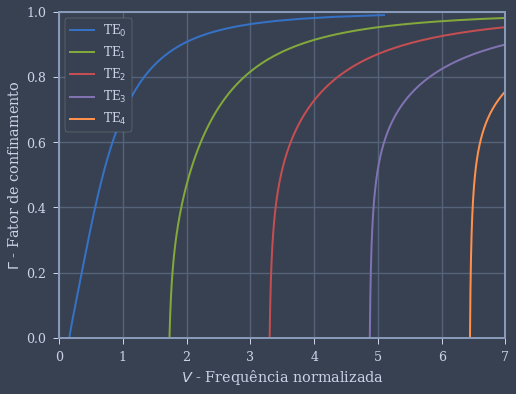

In [16]:
fig6 = plt.figure(figsize=(8,6))
plt.rc('font', **font)

b = np.logspace(-10, -0.03, 1000, endpoint=True)
for i in range(MTE):  
  Vc  = Vb(b, delta, 1, 1, i)
  vv  = np.sqrt(b)*Vc
  uv  = np.sqrt(1-b)*Vc
  wv  = np.sqrt(delta*Vc**2 + vv**2)
  phi = 0.5*(i*np.pi + np.arctan(wv/uv) - np.arctan(vv/uv))
  pcore = 1 + 1/(2*vv) * (np.sin(uv - phi))**2 + 1/(2*wv) * (np.sin(uv+ phi))**2
  pt    = 1 + 1/(2*vv) + 1/(2*wv)
  plt.plot(Vc, pcore/pt, linewidth = 2, label = 'TE$_{%d}$' %(i))

plt.ylabel(r'$\Gamma$ - Fator de confinamento')
plt.xlabel(r'$V$ - Frequência normalizada')
plt.xlim([0, np.ceil(V)])
plt.ylim([0, 1])
plt.legend(loc = 'upper left', framealpha = 1, fontsize = 12)
plt.grid(True)

#('confinement_factor_TE.pdf', bbox_inches='tight')

### TM MODE

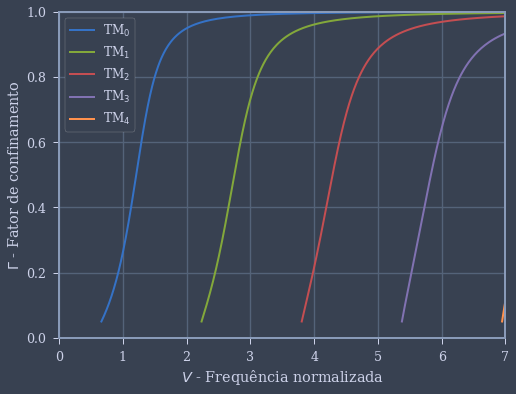

In [17]:
fig7 = plt.figure(figsize=(8,6))
plt.rc('font', **font)

for i in range(MTE):  
  Vc  = Vb(b, delta, pc, ps, i)
  vv  = np.sqrt(b)*Vc
  uv  = np.sqrt(1-b)*Vc
  wv  = np.sqrt(delta*Vc**2 + vv**2)
  phi = 0.5*(i*np.pi + np.arctan(wv/uv) - np.arctan(vv/uv))
  pcore = 1 + 1/(2*vv) * (np.sin(uv - phi))**2 + 1/(2*wv) * (np.sin(uv + phi))**2
  pt    = 1 + 1/(2*vv) * (np.sin(uv - phi))**2 + 1/(2*wv) * (np.sin(uv + phi))**2 + ps/(2*vv) * (np.cos(uv - phi))**2 + pc/(2*wv) * (np.cos(uv + phi))**2
  plt.plot(Vc, pcore/pt, linewidth = 2, label = 'TM$_{%d}$' %(i))

plt.ylabel(r'$\Gamma$ - Fator de confinamento')
plt.xlabel(r'$V$ - Frequência normalizada')
plt.xlim([0, np.ceil(V)])
plt.ylim([0, 1])
plt.legend(loc = 'upper left', framealpha = 1, fontsize = 12)
plt.grid(True)
#('confinement_factor_TM.pdf', bbox_inches='tight')

In [18]:
hzsz = 600
h    = 1.0
nHzP = int(np.round(hzsz/(h+1)))
xc1  = np.linspace(-(h+1)*a,-a, int((hzsz-nHzP)/2)) # substract
xn   = np.linspace(-a,      a,  nHzP) # core
xc2  = np.linspace( a, (h+1)*a, int((hzsz-nHzP)/2)) # cladding

# Intensidade de campo

###TE MODE

C:\Users\lucas\AppData\Local\Temp/ipykernel_16944/4162723586.py:17: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(np.array([1, 1, -1, -1, 1]), np.array([-1.5, 1.5, 1.5, -1.5, -1.5]), 'k--', lineWidth = 1.5)


Text(0, 0.5, '$\\it{H_z(x)/H_0}$')

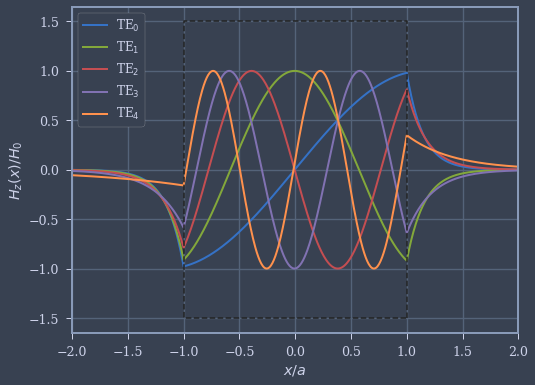

In [19]:
fig8 = plt.figure(figsize=(8,6))
plt.rc('font', **font)

Ho = 1
for i in range(MTE):    
    phi = 0.5*(i*np.pi + np.arctan(alcTE[i]/kfTE[i]) - np.arctan(alsTE[i]/kfTE[i]))
    Hzc2 = Ho *  np.sin(kfTE[i] * a  + phi) * np.exp(-alcTE[i] * (xc2 - a)) # cladding
    Hzc  = Ho *  np.sin(kfTE[i] * xn + phi)  # core
    Hzc1 = Ho * -np.sin(kfTE[i] * a  - phi) * np.exp(alsTE[i] * (xc1 + a)) # substract 
    Hzc  = np.concatenate([Hzc1,Hzc,Hzc2])
    maxHzn = 1.0#np.max(abs(Hzc))
    plt.plot(np.concatenate([xc1,xn,xc2])/a, Hzc/maxHzn, label = 'TE$_{%d}$' %(i), linewidth = 2)

plt.grid(True)
plt.xlim([-(h+1),h+1])
#plt.ylim([-1.5,1.5])
plt.plot(np.array([1, 1, -1, -1, 1]), np.array([-1.5, 1.5, 1.5, -1.5, -1.5]), 'k--', lineWidth = 1.5)
plt.legend(loc = 'upper left', framealpha = 1, fontsize = 12)
plt.xlabel(r'$\it{x/a}$')
plt.ylabel(r'$\it{H_z(x)/H_0}$')

#('te_mode_Hz_field.pdf', bbox_inches='tight')

C:\Users\lucas\AppData\Local\Temp/ipykernel_16944/1874464108.py:17: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(np.array([1, 1, -1, -1, 1]), np.array([-1.5, 1.5, 1.5, -1.5, -1.5]), 'k--', lineWidth = 1.5)


Text(0, 0.5, '$\\it{E_y(x)/H_0}$')

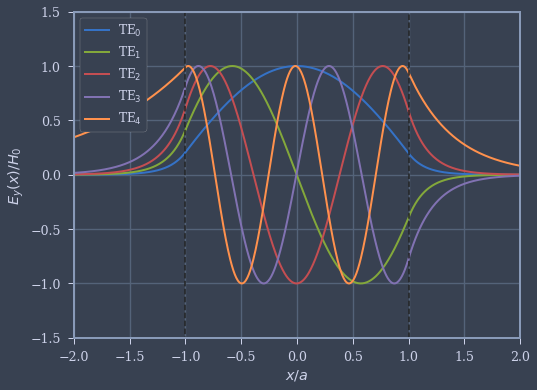

In [20]:
fig9 = plt.figure(figsize=(8,6))
plt.rc('font', **font)
       
Ho = 1
for i in range(MTE):    
    phi = 0.5*(i*np.pi + np.arctan(alcTE[i]/kfTE[i]) - np.arctan(alsTE[i]/kfTE[i]))    
    Eyc2 = Ho * 1/alcTE[i] * np.sin(kfTE[i] * a  + phi) * np.exp(-alcTE[i] * (xc2 - a)) # cladding
    Eyc  = Ho * 1/kfTE[i]  * np.cos(kfTE[i] * xn + phi)  # core
    Eyc1 = Ho * 1/alsTE[i] * np.sin(kfTE[i] * a  - phi) * np.exp(alsTE[i] * (xc1 + a)) # substract
    Eyc = np.concatenate([Eyc1,Eyc,Eyc2])
    maxEyc = np.max(Eyc)
    plt.plot(np.concatenate([xc1,xn,xc2])/a, Eyc/maxEyc, label = 'TE$_{%d}$' %(i), linewidth = 2)

plt.grid(True)
plt.xlim([-(h+1),h+1])
plt.ylim([-1.5,1.5])
plt.plot(np.array([1, 1, -1, -1, 1]), np.array([-1.5, 1.5, 1.5, -1.5, -1.5]), 'k--', lineWidth = 1.5)
plt.legend(loc = 'upper left', framealpha = 1, fontsize = 12)
plt.xlabel(r'$\it{x/a}$')
plt.ylabel(r'$\it{E_y(x)/H_0}$')

#('te_mode_Ey_field.pdf', bbox_inches='tight')

###TM MODE

C:\Users\lucas\AppData\Local\Temp/ipykernel_16944/2360145290.py:15: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(np.array([1, 1, -1, -1, 1]), np.array([-1.5, 1.5, 1.5, -1.5, -1.5]), 'k--', lineWidth = 1.5)


Text(0, 0.5, '$\\it{E_z(x)/E_0}$')

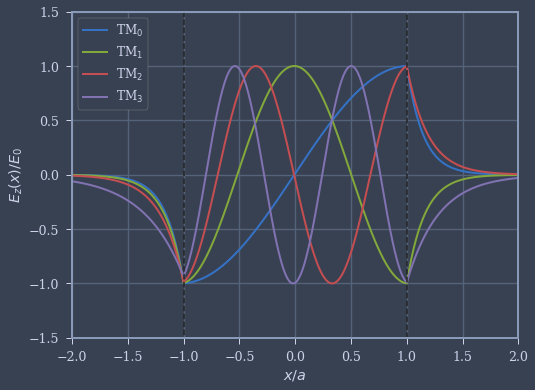

In [21]:
fig10 = plt.figure(figsize=(8,6))
plt.rc('font', **font)

Eo = 1
for i in range(MTM):
    phi = 0.5*(i*np.pi + np.arctan(pc*alcTM[i]/kfTM[i]) - np.arctan(ps*alsTM[i]/kfTM[i]))
    Ezc2 = Eo *  np.sin(kfTM[i] * a  + phi) * np.exp(-alcTM[i] * (xc2 - a)) # cladding
    Ezc  = Eo *  np.sin(kfTM[i] * xn + phi)  # core
    Ezc1 = Eo * -np.sin(kfTM[i] * a  - phi) * np.exp(alsTM[i] * (xc1 + a)) # substract
    plt.plot(np.concatenate([xc1,xn,xc2])/a, np.concatenate([Ezc1,Ezc,Ezc2]), label = 'TM$_{%d}$' %(i), linewidth = 2)

plt.grid(True)
plt.xlim([-(h+1),h+1])
plt.ylim([-1.5,1.5])
plt.plot(np.array([1, 1, -1, -1, 1]), np.array([-1.5, 1.5, 1.5, -1.5, -1.5]), 'k--', lineWidth = 1.5)
plt.legend(loc = 'upper left', framealpha = 1, fontsize = 12)
plt.xlabel(r'$\it{x/a}$')
plt.ylabel(r'$\it{E_z(x)/E_0}$')

#('tm_mode_Ez_field.pdf', bbox_inches='tight')

C:\Users\lucas\AppData\Local\Temp/ipykernel_16944/3183745186.py:15: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(np.array([1, 1, -1, -1, 1]), np.array([-1.5, 1.5, 1.5, -1.5, -1.5]), 'k--', lineWidth = 1.5)


[1540712.80082909 3075964.30238294 4593624.46717714 6030618.98263714]


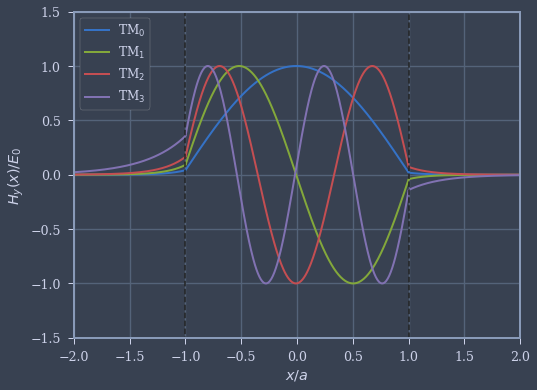

In [24]:
fig11 = plt.figure(figsize=(8,6))
plt.rc('font', **font)

Eo = 1
for i in range(MTM):
    phi = 0.5*(i*np.pi + np.arctan(pc*alcTM[i]/kfTM[i]) - np.arctan(ps*alsTM[i]/kfTM[i]))
    Hyc2 = Eo * (nc**2)/alcTM[i] * np.sin(kfTM[i] * a  + phi) * np.exp(-alcTM[i] * (xc2 - a)) # cladding
    Hyc  = Eo * (nf**2)/kfTM[i]  * np.cos(kfTM[i] * xn + phi)  # core
    Hyc1 = Eo * (ns**2)/alsTM[i] * np.sin(kfTM[i] * a  - phi) * np.exp(alsTM[i] * (xc1 + a)) # substract
    plt.plot(np.concatenate([xc1,xn,xc2])/a, np.concatenate([Hyc1,Hyc,Hyc2])/Hyc.max(), label = 'TM$_{%d}$' %(i), linewidth = 2)

plt.grid(True)
plt.xlim([-(h+1),h+1])
plt.ylim([-1.5,1.5])
plt.plot(np.array([1, 1, -1, -1, 1]), np.array([-1.5, 1.5, 1.5, -1.5, -1.5]), 'k--', lineWidth = 1.5)
plt.legend(loc = 'upper left', framealpha = 1, fontsize = 12)
plt.xlabel(r'$\it{x/a}$')
plt.ylabel(r'$\it{H_y(x)/E_0}$')
print(kfTM)
#('tm_mode_Hy_field.pdf', bbox_inches='tight')

# Velocidade de grupo e fase

\begin{align}
  v_p &= \frac{c}{n_{eff}} \\
  n_g &= n_{eff}-\frac{\mathrm{d}n_{eff}}{\mathrm{d}\lambda} \lambda_0
\end{align}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


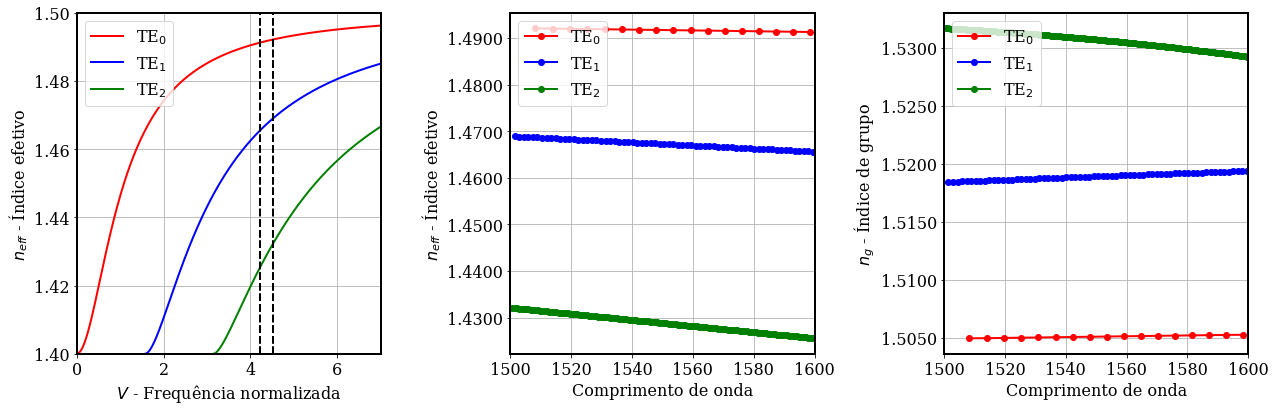

In [ ]:
import matplotlib.ticker as ticker
fig12, axs12 = plt.subplots(1, 3, figsize=(18,6))
plt.rc('font', **font)

b = np.linspace(0,1,2000)
V_1500nm = a*2*np.pi/1500e-9*NA
V_1600nm = a*2*np.pi/1600e-9*NA
M = int(np.ceil((2*V_1500nm-np.arctan(np.sqrt(delta)))/np.pi))

plt.rcParams['axes.prop_cycle'] = cycler(color='rbg')

for i in range(M):
  Vc    = Vb(b, delta, 1, 1, i)
  neffc = b2neff(ns, NA, b)  

  axs12[0].plot(Vc, neffc, label = 'TE$_{%d}$' %(i), linewidth = 2)
  axs12[0].plot(np.array([V_1500nm,V_1500nm]), [ns, nf], 'k--', linewidth = 2)
  axs12[0].plot(np.array([V_1600nm,V_1600nm]), [ns, nf], 'k--', linewidth = 2)
  axs12[0].grid(True)
  axs12[0].set_xlabel(r'$V$ - Frequência normalizada')
  axs12[0].set_ylabel(r'$n_{eff}$ - Índice efetivo')
  axs12[0].set_xlim([0,np.ceil(V)])
  axs12[0].set_ylim([ns, nf])
  axs12[0].legend(loc = 'upper left')

  lmbdc = a*2*np.pi*NA/Vc
  idx1600 = np.argmin(np.abs(lmbdc - 1600e-9))
  idx1500 = np.argmin(np.abs(lmbdc - 1500e-9))

  axs12[1].plot(1e9*lmbdc[idx1600:idx1500], neffc[idx1600:idx1500], 'o-', label = 'TE$_{%d}$' %(i), linewidth = 2)
  axs12[1].grid(True)
  axs12[1].set_xlabel('Comprimento de onda')
  axs12[1].set_ylabel(r'$n_{eff}$ - Índice efetivo')
  axs12[1].set_xlim([1500,1600])
  axs12[1].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.4f'))
  axs12[1].legend(loc = 'upper left')

  ng = neffc[idx1600:idx1500]
  lmbdg = lmbdc[idx1600:idx1500]
  ng = ng - np.gradient(ng, lmbdg) * lmbdg

  axs12[2].plot(1e9*lmbdg, ng, 'o-', label = 'TE$_{%d}$' %(i), linewidth = 2)
  axs12[2].grid(True)
  axs12[2].set_xlabel('Comprimento de onda')
  axs12[2].set_ylabel(r'$n_g$ - Índice de grupo')
  axs12[2].set_xlim([1500,1600])
  axs12[2].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.4f'))
  axs12[2].legend(loc = 'upper left')

fig12.tight_layout()